## Case Study Continued

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

<b> Clean data and remove null values

In [151]:
new_df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
6,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
10904,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [152]:
new_df = pd.read_csv('Data/file4.csv')
new_df = new_df.drop("Unnamed: 0", axis=1)

In [153]:
new_df = new_df.drop(["Customer", "Vehicle Type", "Effective To Date"], axis=1)

In [154]:
new_df.isna().sum()

State                            631
Customer Lifetime Value            0
Response                         631
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                    622
Vehicle Size                     622
dtype: int64

In [155]:
new_df["Response"] = new_df["Response"].fillna("No")

In [156]:
new_df["Number of Open Complaints"] = new_df["Number of Open Complaints"].fillna(0.0)


In [157]:
new_df = new_df.dropna()

In [158]:
new_df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

<AxesSubplot:>

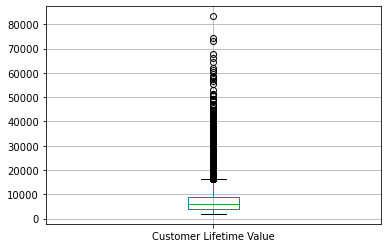

In [159]:
new_df.boxplot(["Customer Lifetime Value"])

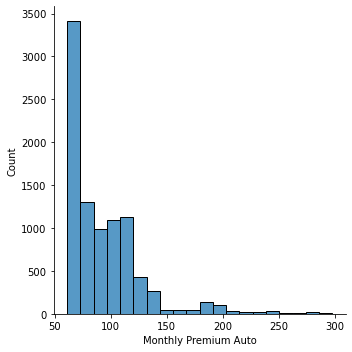

In [160]:
sns.displot((new_df['Monthly Premium Auto']), bins=20)

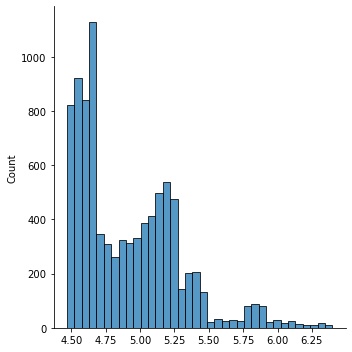

In [161]:
e_boxcox=boxcox(new_df["Monthly Premium Auto"],lmbda=0.04)
e_boxcox
sns.displot(e_boxcox)

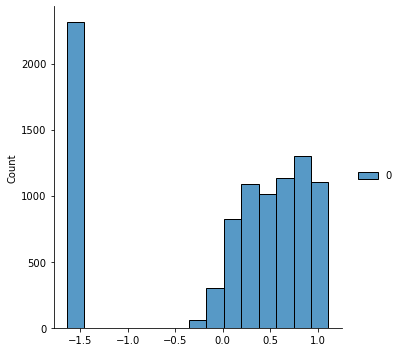

In [162]:
pt = PowerTransformer()
income_transformed=pt.fit_transform(new_df['Income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

<b> Split into dependant and independant variables

In [163]:
x=new_df.drop("Total Claim Amount", axis=1)
y=new_df["Total Claim Amount"]

In [164]:
xn = x._get_numeric_data()
xn

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
6,5035.035257,37405,63,8.0,99,3.0,4
...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1
10904,19228.463620,0,187,14.0,32,0.0,2
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

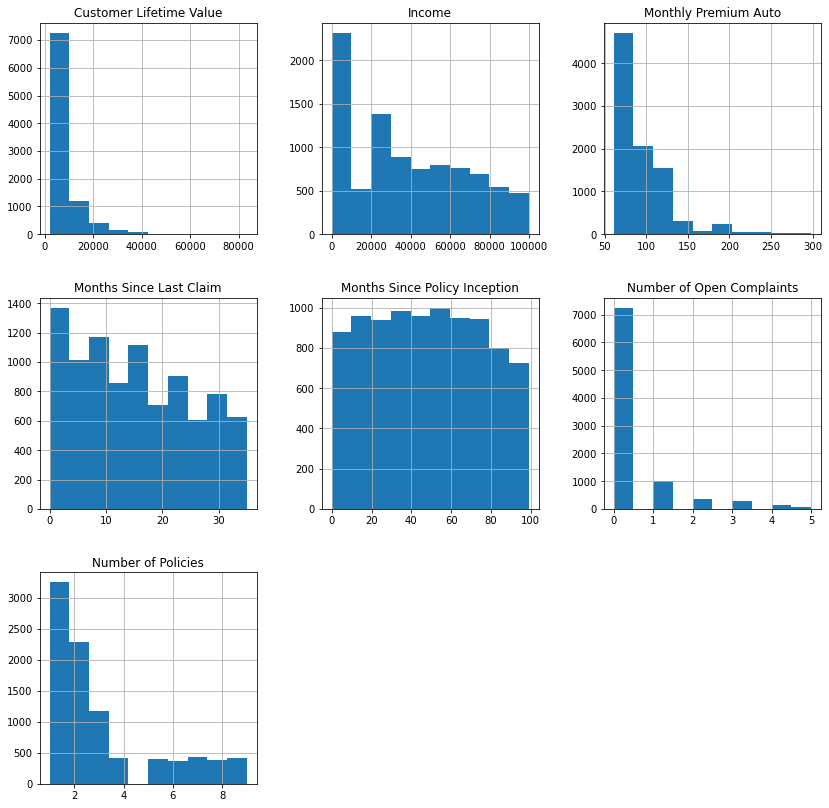

In [165]:
xn.hist(figsize=(14,14))

In [166]:
xn_scaled = StandardScaler().fit_transform(xn)
xn_scaled

array([[-0.46513077,  0.34141607, -0.93644167, ...,  0.14103142,
        -0.42224956,  2.52456108],
       [-0.84074497, -1.23961684, -0.84924779, ..., -0.79071917,
        -0.42224956, -0.82264788],
       [ 1.01053553, -0.51083865,  0.19707879, ..., -0.61153636,
        -0.42224956, -0.40424676],
       ...,
       [-0.39960106,  0.77320538, -0.82018316, ...,  0.7144164 ,
        -0.42224956,  1.26935772],
       [ 2.31251759,  0.07174938,  3.13260614, ...,  0.5352336 ,
        -0.42224956, -0.40424676],
       [ 0.57739384,  0.87357327,  1.88282717, ..., -0.7548826 ,
         3.97174357,  1.26935772]])

In [168]:
xc = x.select_dtypes(include=['object'])
xc = pd.get_dummies(xc)
xc

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
6,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
10904,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
10906,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
10907,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [169]:
x = pd.concat([xn, xc], axis=1)
x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,4809.216960,48029,61,7.0,52,0.0,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2228.525238,0,64,3.0,26,0.0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22332.439460,49078,97,10.0,3,0.0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,5035.035257,37405,63,8.0,99,3.0,4,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
10904,19228.463620,0,187,14.0,32,0.0,2,0,0,1,...,0,0,0,1,0,0,0,0,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [170]:
# x = x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]
# x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,4809.216960,48029,61,7.0,52,0.0,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2228.525238,0,64,3.0,26,0.0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,22332.439460,49078,97,10.0,3,0.0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,4956.247235,87197,63,35.0,45,0.0,3,0,1,0,...,0,0,0,0,0,0,1,0,1,0
10,5154.764074,82730,127,13.0,31,0.0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,5260.623466,31006,67,20.0,16,0.0,4,0,1,0,...,0,1,0,0,0,0,0,0,1,0
10896,19776.566540,70699,82,1.0,57,0.0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10898,5807.659307,62447,74,9.0,2,0.0,7,0,1,0,...,0,0,0,0,0,0,1,0,1,0
10902,3579.023825,28304,91,10.0,30,2.0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [171]:
#y

0        292.800000
1        744.924331
2        480.000000
3        484.013411
6        287.556107
            ...    
10903    355.200000
10904    897.600000
10906    273.018929
10907    381.306996
10908    618.288849
Name: Total Claim Amount, Length: 9134, dtype: float64

## Linear Regression

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

<b> Standardise

In [133]:
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)
x_test_scaled=std_scaler.transform(x_test)

<b> Model using Statsmodels

In [134]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     511.5
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:58:47   Log-Likelihood:                -46379.
No. Observations:                7307   AIC:                         9.286e+04
Df Residuals:                    7258   BIC:                         9.319e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.5041      1.621    267.983      0.0

In [135]:
print(model.rsquared_adj)

0.7703121424013355


<b> Model using Scikit Learn

In [136]:
reg = LinearRegression().fit(x_train_scaled, y_train)

In [137]:
reg.coef_

array([ 2.65478814e-01, -8.37488527e+00,  1.67137863e+02,  5.61884880e+00,
        1.13093497e+00, -7.55272070e-01,  4.45868715e+00,  4.51667333e+14,
        5.48521504e+14,  3.37893351e+14,  5.19981789e+14,  3.27373744e+14,
        9.88652821e+14,  9.88652821e+14, -7.97057171e+14, -7.46782164e+14,
       -4.74936353e+14, -2.37547815e+14, -2.34976360e+14, -9.95687632e+13,
       -2.33053236e+14, -1.42447651e+14,  1.32249102e+14,  3.07121307e+14,
        1.30917368e+14,  1.09310599e+14,  2.76372693e+14,  4.87531810e+14,
        4.87531810e+14,  8.22016273e+14,  1.00768402e+15,  7.95785771e+14,
        6.92672961e+14,  9.52733393e+14,  8.55675736e+14, -1.98131837e+14,
       -2.43481716e+14, -5.00857276e+14, -1.45453488e+13, -1.78464368e+13,
       -2.28607690e+13,  1.48075341e+12,  1.86100861e+12,  2.12580549e+12,
        1.62053784e+14,  2.71118701e+14,  2.42073988e+14, -3.01996124e+14,
       -2.85149053e+14, -2.24767476e+14, -1.93970317e+14,  8.43462010e+13,
        7.83070201e+13,  

In [138]:
reg.intercept_

434.9835138309327

In [139]:
reg.score(x_test_scaled, y_test)

0.7652434291323797

<b> Making Prediction

In [140]:
y_pred = reg.predict(x_test_scaled)
y_pred

array([546.14058114, 325.32299673, -44.73441886, ..., 656.64058114,
       378.32299673, 217.26558114])

In [141]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
855,456.523850,546.140581
52,406.902001,325.322997
4816,128.516525,-44.734419
1844,110.868874,-48.359419
4457,106.737787,-1.359419
...,...,...
5848,130.775164,-73.234419
2284,621.959357,684.322997
10134,747.658769,656.640581
7190,482.400000,378.322997


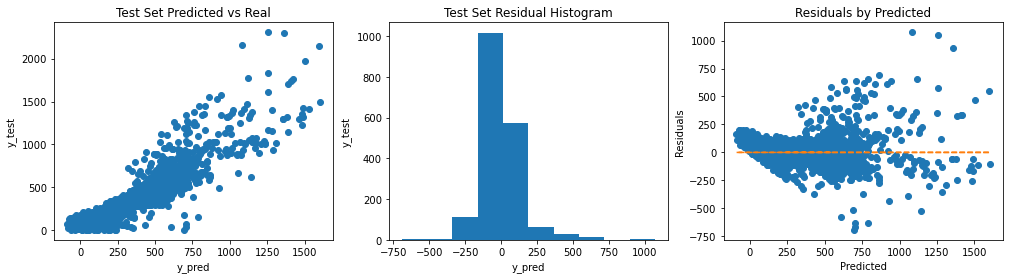

In [142]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_pred")
ax[0].set_ylabel("y_test")
ax[0].set_title("Test Set Predicted vs Real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_pred")
ax[1].set_ylabel("y_test")
ax[1].set_title("Test Set Residual Histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

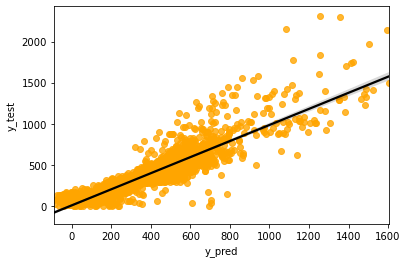

In [143]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "orange"}, line_kws={"color": "black"})

<b> Error Metrics

In [144]:
MSE = mse(y_test, y_pred)
MSE

20521.86166884395

In [145]:
RMSE = mse(y_test, y_pred, squared=False)
RMSE

143.25453454897666

In [146]:
MAE = mae(y_test, y_pred)
MAE

98.14832326840502

In [147]:
R2 = r2_score(y_test, y_pred)
R2

0.7652434291323797